# Tugas 


1. Buat graph berarah dengan networkx (minimal 9 node )
    * Hitung manual pagerank dari graph yang anda buat
    * Hitung menggunakan pagerank menggunakan networkx

2. Implementasikan ulang  https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb
3. Upload di github repository webstatis masing masing
4.  Beri penjelasan terkait dengan proses 


In [ ]:
# import modul yang akan digunakan
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# membuat graph berarah menggunakan DiGraph 
D= nx.DiGraph()
# menambahkan node
# D.add_edges_from([(1,4),(2,4),(5,1),(2,5),(5,6),(6,3),(3,7),(7,1),(1,8),(7,9)])

D.add_edges_from([(1,2),(3,1),(2,3),(2,5),(2,4),(3,4),(3,6),(5,7),(7,6),(7,8),(8,9),(9,7)])
# mengetahui jumlah node dan edge
print('Jumlah node : ', D.number_of_nodes())
print('Jumlah edge : ', D.number_of_edges())


Jumlah node :  9
Jumlah edge :  12


* menampilkan graph

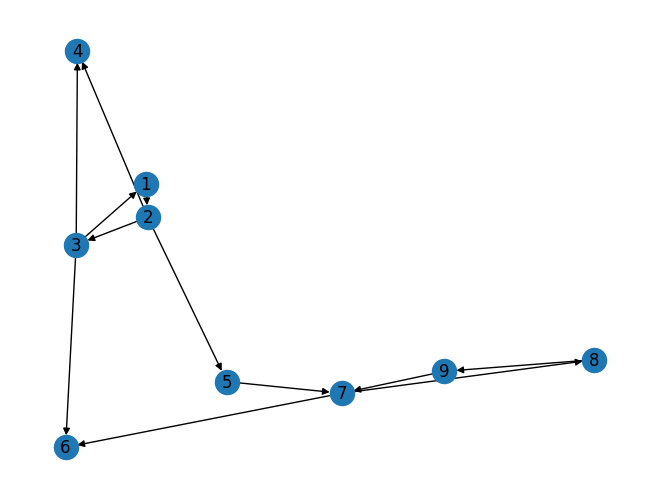

In [ ]:
nx.draw(D, with_labels=True)

## 1. Hitung manual pagerank dari graph yang anda buat

## 2. Hitung menggunakan pagerank menggunakan networkx

In [ ]:
# Perhitungan menggunakan networkx
pr = nx.pagerank(D)
pr

{1: 0.05620554913826617, 2: 0.08618014427224654, 3: 0.06282337190760358, 5: 0.06282337190760358, 4: 0.08062326162712885, 6: 0.14955370749680647, 7: 0.21963976014118525, 8: 0.13175381777728118, 9: 0.1503970157318781}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Implementasi ulang https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb

## 1. import library yang di perlukan

In [ ]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.2 MB/s eta 0:00:00


In [ ]:
pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=4707b95cf37e4f43dffd91293bc39095a3e277a2d19837c38ca34dd5b1ec54ee
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt


In [ ]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
import networkx as nx

In [ ]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

## 2. membuat fungsi untuk membaca data dari user

Format yang didukung dalam fungsi berupa type data : .txt, .pdf, kemudian untuk input berupa nama file yang akan di proses dan output berupa string yang berisi konten file.

In [ ]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

## 3. membuat fungsi untuk tokenisasi dokumen

input berupa data string dari dokumen sedangkan outputnya berupa list dari hasil tokenisasi

In [ ]:
# the function used for tokenizing the sentences
# tokenization of a sentence: '''provided in cell() above'''

def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

## 4. membaca dokument atau dataset

In [ ]:
# masuk ke direktori prosaindata
%cd /content/drive/MyDrive/prosaindata/tugas

In [ ]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

## 4. Menampilkan kalimat pada dokumen kedalam list

In [ ]:
# we want to tokenize the document for further processing
# tokenizing the sentence means that we are creating a list of all the sentences of the document.
# Need of tokenizing the document: Initially the document is in just a string format.
# if we want to process the document, we need to store it in a data structure.
# Tokenization of document into words is also possible, but we will go with the tokenizing with the sentences
# Since we want to choose the most relevant sentences, we need to generate tokens of sentences only
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

In [ ]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

In [ ]:
# let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

In [ ]:
# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

## 5. Hasilkan term-document matrix (TD matrix) dari data

In [ ]:
# Convert a collection of text documents to a matrix of token counts
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: An iterable which yields either str, unicode or file objects.
# O/p: The term-document matrix named cv_matrix
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [ ]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names_out()))

In [ ]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

In [ ]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

In [ ]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

## 7. Menmpilkan hasil graph dalam gambar

In [ ]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

# nx_graph = nx.from_scipy_sparse_matrix(res_graph)
# nx.draw_circular(nx_graph)
# print('Number of edges {}'.format(nx_graph.number_of_edges()))
# print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
# plt.show()
# print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [ ]:
#  note that the graph above is dense and therefor it resembles a circle
# if a shorter document is taken, a beautiful circular graph can be seen 

## 8. Mendapatkan peringkat setiap kalimat menggunakan textrank

In [ ]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

## 9. Menemukan kalimat penting dan menghasilkan ringkasan

In [ ]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [ ]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [ ]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

In [ ]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

In [ ]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [ ]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [ ]:
model = sentence_list

## 10. Menulis ringkasan ke file baru

In [ ]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

In [ ]:
for lines in sentence_list:
    print(lines)